In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [53]:
import pyts
from pyts import classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc

In [31]:
X_train = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled_max.npy")
X_test = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled_max.npy")
y_train = pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv")
y_test = pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv")

In [32]:
y_train = y_train["emotion"]
y_test = y_test["emotion"]

## KNN

### pyts

In [33]:
knn_eucl = pyts.classification.KNeighborsClassifier(metric="euclidean")
knn_eucl.fit(X_train, y_train)

y_pred_knn_eucl = knn_eucl.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn_eucl))
print('F1-score %s' % f1_score(y_test, y_pred_knn_eucl, average=None))
print(classification_report(y_test, y_pred_knn_eucl))

Accuracy 0.20673076923076922
F1-score [0.19428571 0.3        0.10126582 0.13173653 0.21875    0.27868852
 0.21198157 0.125     ]
              precision    recall  f1-score   support

       angry       0.22      0.18      0.19        96
        calm       0.29      0.31      0.30        96
     disgust       0.13      0.08      0.10        48
     fearful       0.15      0.11      0.13        96
       happy       0.22      0.22      0.22        96
     neutral       0.23      0.35      0.28        48
         sad       0.19      0.24      0.21        96
   surprised       0.12      0.12      0.12        48

    accuracy                           0.21       624
   macro avg       0.19      0.20      0.20       624
weighted avg       0.20      0.21      0.20       624



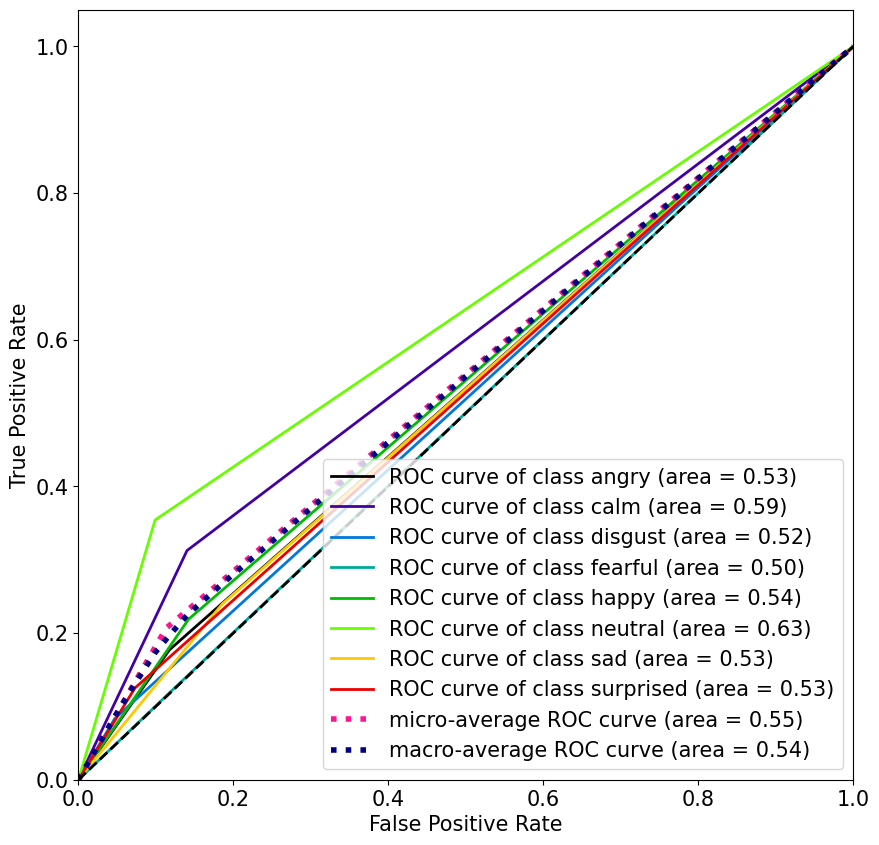

In [54]:
y_score = knn_eucl.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()

In [34]:
knn_dtw = pyts.classification.KNeighborsClassifier(metric="dtw")
knn_dtw.fit(X_train, y_train)

y_pred_knn_dtw = knn_dtw.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn_dtw))
print('F1-score %s' % f1_score(y_test, y_pred_knn_dtw, average=None))
print(classification_report(y_test, y_pred_knn_dtw))

Accuracy 0.22435897435897437
F1-score [0.27027027 0.34080717 0.23809524 0.13496933 0.23350254 0.15789474
 0.17560976 0.15584416]
              precision    recall  f1-score   support

       angry       0.28      0.26      0.27        96
        calm       0.30      0.40      0.34        96
     disgust       0.28      0.21      0.24        48
     fearful       0.16      0.11      0.13        96
       happy       0.23      0.24      0.23        96
     neutral       0.14      0.19      0.16        48
         sad       0.17      0.19      0.18        96
   surprised       0.21      0.12      0.16        48

    accuracy                           0.22       624
   macro avg       0.22      0.21      0.21       624
weighted avg       0.22      0.22      0.22       624



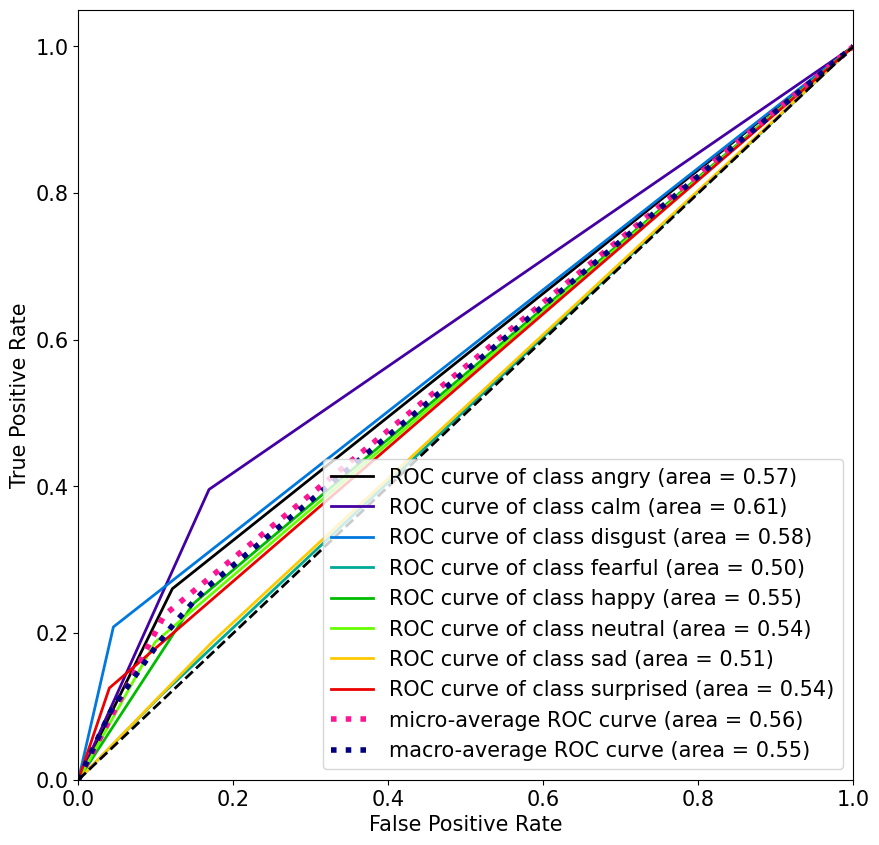

In [55]:
y_score = knn_dtw.predict_proba(X_test)
plot_roc(y_test, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()

## Shapelets Classifier

In [35]:
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

In [36]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 1828
ts_sz 50
n_classes 8
shapelet_sizes {5: 5}


In [37]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes, optimizer="sgd", weight_regularizer=.01, max_iter=200, verbose=1)

c:\ProgramData\anaconda3\envs\env1\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [38]:
shp_clf.fit(X_train, y_train)

Epoch 1/200
8/8 [==============================] - 1s 5ms/step - loss: 4.1850 - categorical_accuracy: 0.0979 - categorical_crossentropy: 4.1278
Epoch 2/200
8/8 [==============================] - 0s 3ms/step - loss: 3.4046 - categorical_accuracy: 0.1313 - categorical_crossentropy: 3.3514
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 3.1673 - categorical_accuracy: 0.1379 - categorical_crossentropy: 3.1169
Epoch 4/200
8/8 [==============================] - 0s 3ms/step - loss: 3.0123 - categorical_accuracy: 0.1422 - categorical_crossentropy: 2.9646
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 2.9024 - categorical_accuracy: 0.1433 - categorical_crossentropy: 2.8568
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 2.8139 - categorical_accuracy: 0.1477 - categorical_crossentropy: 2.7705
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 2.7439 - categorical_accuracy: 0.1466 - categorical_crossentropy:

LearningShapelets(max_iter=200, n_shapelets_per_size={5: 5}, verbose=1,
                  weight_regularizer=0.01)

In [39]:
'''
y_pred = shp_clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
'''

"\ny_pred = shp_clf.predict(X_test)\nprint('Accuracy %s' % accuracy_score(y_test, y_pred))\nprint('F1-score %s' % f1_score(y_test, y_pred, average=None))\nprint(classification_report(y_test, y_pred))\n"

In [40]:
X_train_sh = shp_clf.transform(X_train)
X_test_sh = shp_clf.transform(X_test)

3/3 [==============================] - 0s 4ms/step


In [41]:
knn_shp = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_shp.fit(X_train_sh, y_train)


y_pred_knn_shp = knn_shp.predict(X_test_sh)

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn_shp))
print('F1-score %s' % f1_score(y_test, y_pred_knn_shp, average=None))
print(classification_report(y_test, y_pred_knn_shp))

Accuracy 0.1842948717948718
F1-score [0.26923077 0.28054299 0.08163265 0.13559322 0.17989418 0.02666667
 0.19480519 0.        ]
              precision    recall  f1-score   support

       angry       0.21      0.36      0.27        96
        calm       0.25      0.32      0.28        96
     disgust       0.08      0.08      0.08        48
     fearful       0.15      0.12      0.14        96
       happy       0.18      0.18      0.18        96
     neutral       0.04      0.02      0.03        48
         sad       0.26      0.16      0.19        96
   surprised       0.00      0.00      0.00        48

    accuracy                           0.18       624
   macro avg       0.15      0.16      0.15       624
weighted avg       0.17      0.18      0.17       624



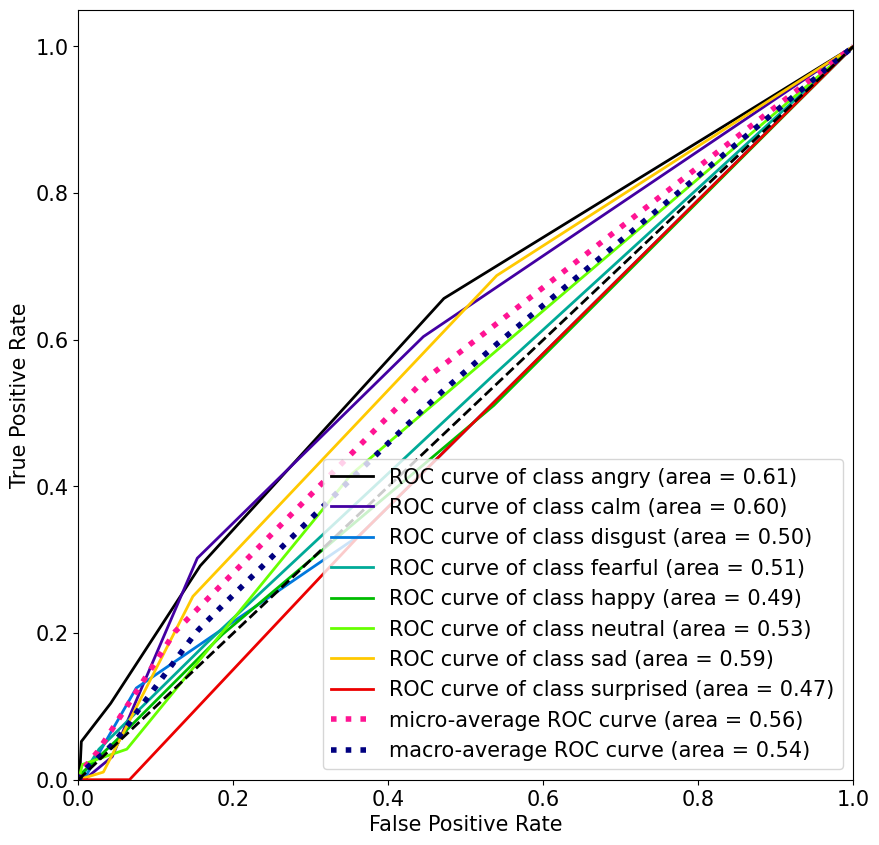

In [57]:
y_score = knn_shp.predict_proba(X_test_sh)
plot_roc(y_test, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()

In [42]:
dt_shp = DecisionTreeClassifier(max_depth=8, random_state=42, class_weight="balanced")
dt_shp.fit(X_train_sh, y_train)

y_pred_dt_shp = dt_shp.predict(X_test_sh)

print('Accuracy %s' % accuracy_score(y_test, y_pred_dt_shp))
print('F1-score %s' % f1_score(y_test, y_pred_dt_shp, average=None))
print(classification_report(y_test, y_pred_dt_shp))

Accuracy 0.14743589743589744
F1-score [0.21348315 0.25806452 0.18518519 0.05714286 0.12       0.09655172
 0.10810811 0.08641975]
              precision    recall  f1-score   support

       angry       0.23      0.20      0.21        96
        calm       0.23      0.29      0.26        96
     disgust       0.17      0.21      0.19        48
     fearful       0.09      0.04      0.06        96
       happy       0.17      0.09      0.12        96
     neutral       0.07      0.15      0.10        48
         sad       0.15      0.08      0.11        96
   surprised       0.06      0.15      0.09        48

    accuracy                           0.15       624
   macro avg       0.15      0.15      0.14       624
weighted avg       0.16      0.15      0.14       624



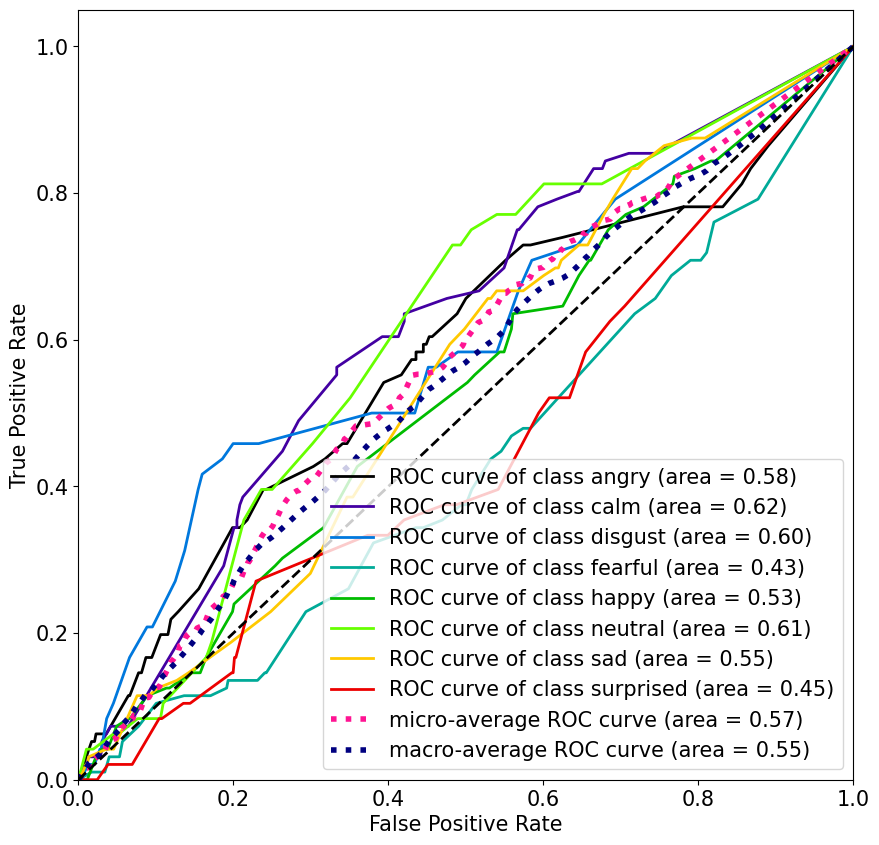

In [58]:
y_score = dt_shp.predict_proba(X_test_sh)
plot_roc(y_test, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()

## CNN

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, BatchNormalization

In [44]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=3, kernel_size=3, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.1))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [45]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  50
N. LABELS:  8


In [46]:
to_int_map={"angry":0, "calm":1, "disgust":2, "fearful":3, "happy":4, "neutral":5, "sad":6, "surprised":7}
y_train_cnn=np.asarray([to_int_map.get(string,0) for string in y_train_cnn])
y_test_cnn=np.asarray([to_int_map.get(string,0) for string in y_test])
y_val_cnn=np.asarray([to_int_map.get(string,0) for string in y_val_cnn])
y_test_cnn=np.asarray([to_int_map.get(string,0) for string in y_test])

In [47]:
cnn = build_simple_cnn(n_timesteps, n_outputs)
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 48, 3)             12        
                                                                 
 batch_normalization_1 (Batc  (None, 48, 3)            12        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 48, 3)             0         
                                                                 
 dropout_1 (Dropout)         (None, 48, 3)             0         
                                                                 
 global_average_pooling1d_1   (None, 3)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 8)                

In [48]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [49]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.0001)
#mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=8, verbose=1, restore_best_weights=True)

callbacks = [rlr, es] 
             #, mc]
batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))


history = cnn.fit(X_train_cnn, y_train_cnn, epochs=100, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn))

Epoch 1/100
92/92 [==============================] - 1s 6ms/step - loss: 2.1094 - accuracy: 0.1320 - val_loss: 2.0993 - val_accuracy: 0.1503 - lr: 0.0010
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 2.0724 - accuracy: 0.1560 - val_loss: 2.0573 - val_accuracy: 0.1475 - lr: 0.0010
Epoch 3/100
92/92 [==============================] - 0s 4ms/step - loss: 2.0522 - accuracy: 0.1573 - val_loss: 2.0396 - val_accuracy: 0.1721 - lr: 0.0010
Epoch 4/100
92/92 [==============================] - 0s 4ms/step - loss: 2.0424 - accuracy: 0.1594 - val_loss: 2.0290 - val_accuracy: 0.1503 - lr: 0.0010
Epoch 5/100
92/92 [==============================] - 0s 4ms/step - loss: 2.0336 - accuracy: 0.1546 - val_loss: 2.0219 - val_accuracy: 0.1448 - lr: 0.0010
Epoch 6/100
92/92 [==============================] - 0s 4ms/step - loss: 2.0246 - accuracy: 0.1560 - val_loss: 2.0164 - val_accuracy: 0.1393 - lr: 0.0010
Epoch 7/100
92/92 [==============================] - 0s 4ms/step - loss: 2.0

In [50]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

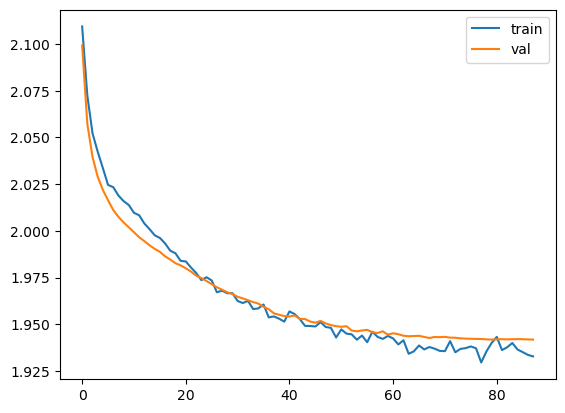

In [51]:
plt.plot(train_loss, label="train")
plt.plot(val_loss, label="val")
plt.legend()
plt.show()

In [52]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test_cnn, y_pred))
print('F1-score %s' % f1_score(y_test_cnn, y_pred, average=None))
print(classification_report(y_test_cnn, y_pred))

20/20 [==============================] - 0s 2ms/step
Accuracy 0.2419871794871795
F1-score [0.35454545 0.39316239 0.         0.18848168 0.1        0.
 0.1878453  0.        ]
              precision    recall  f1-score   support

           0       0.31      0.41      0.35        96
           1       0.27      0.72      0.39        96
           2       0.00      0.00      0.00        48
           3       0.19      0.19      0.19        96
           4       0.12      0.08      0.10        96
           5       0.00      0.00      0.00        48
           6       0.20      0.18      0.19        96
           7       0.00      0.00      0.00        48

    accuracy                           0.24       624
   macro avg       0.14      0.20      0.15       624
weighted avg       0.17      0.24      0.19       624



c:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20/20 [==============================] - 0s 2ms/step


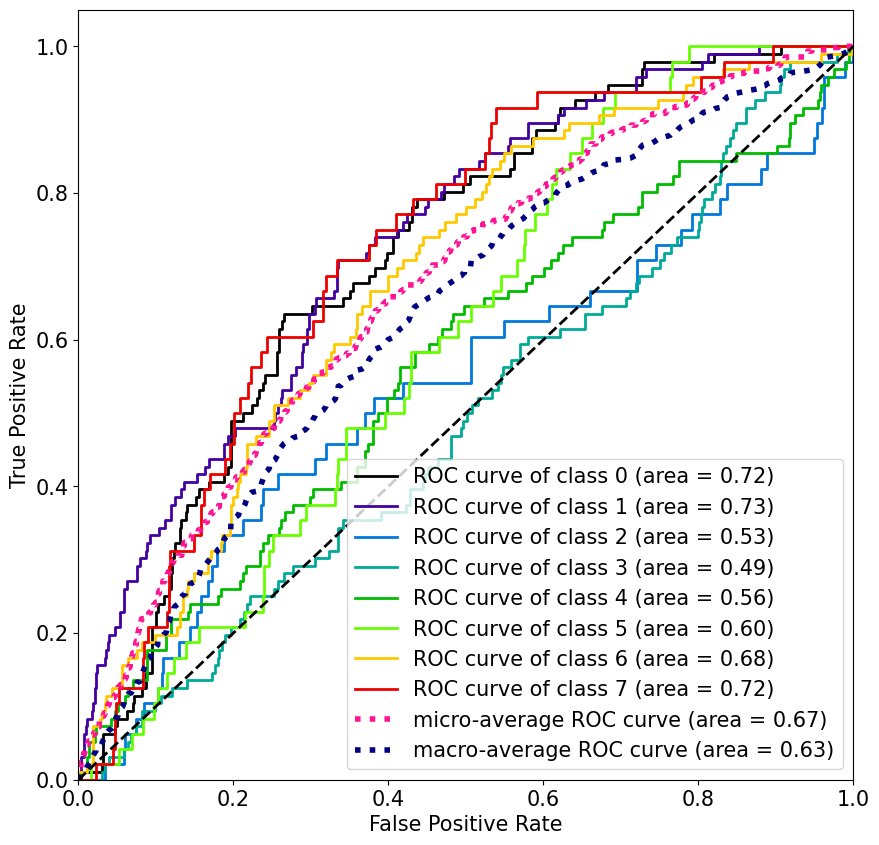

In [60]:
y_score = cnn.predict(X_test_cnn)
plot_roc(y_test_cnn, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()